In [ ]:
!pip install gradio

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 211 kB 48.4 MB/s 
     |████████████████████████████████| 2.0 MB 45.4 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 255 kB 48.5 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 43.7 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 53.0 MB/s 
     |████████████████████████████████| 144 kB 59.2 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 10.9 MB 35.9 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 61 kB 436 kB/s 
     |████████████████████████████████| 3.6 MB 43.5 MB/s 
     |████████████████████████

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pathlib
flowers_dataset_path = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
loaded_data = tf.keras.utils.get_file('flower_photos', origin=flowers_dataset_path, untar=True)
loaded_data = pathlib.Path(loaded_data)

228827136/228813984 [==============================] - 1s 0us/step


/root/.keras/datasets/flower_photos/roses/14597445311_8acb60247e.jpg


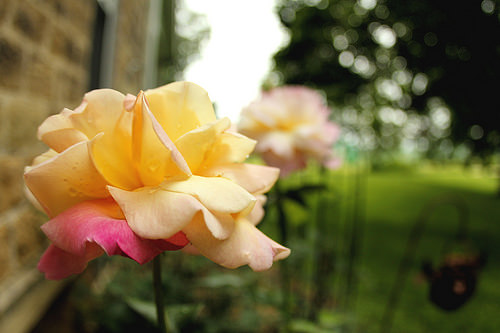

In [ ]:
roses = list(loaded_data.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [ ]:
set_height,set_width=180,180
batch_size=32

training_images = tf.keras.preprocessing.image_dataset_from_directory(
  loaded_data,
  subset="training",
  validation_split=0.25,
  seed=123,
  image_size=(set_height, set_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2753 files for training.


In [ ]:
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
  loaded_data,
  subset="validation",
  validation_split=0.25,
  seed=123,
  image_size=(set_height, set_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 917 files for validation.


In [ ]:
flower_classes = training_images.class_names
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
dataset_classes = 5

from tensorflow.keras.models import Sequential

model = Sequential([
                    
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(set_height, set_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  
  layers.Dense(dataset_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10


CNN_model = model.fit(
  training_images,
  validation_data=validation_images,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


87/87 [==============================] - 92s 1s/step - loss: 1.3735 - accuracy: 0.4014 - val_loss: 1.3505 - val_accuracy: 0.4286
Epoch 2/10
87/87 [==============================] - 90s 1s/step - loss: 1.0642 - accuracy: 0.5637 - val_loss: 1.1292 - val_accuracy: 0.5529
Epoch 3/10
87/87 [==============================] - 90s 1s/step - loss: 0.8817 - accuracy: 0.6629 - val_loss: 1.0650 - val_accuracy: 0.5921
Epoch 4/10
87/87 [==============================] - 90s 1s/step - loss: 0.8268 - accuracy: 0.6822 - val_loss: 1.1664 - val_accuracy: 0.5725
Epoch 5/10
87/87 [==============================] - 90s 1s/step - loss: 0.5376 - accuracy: 0.8039 - val_loss: 1.2262 - val_accuracy: 0.6041
Epoch 6/10
87/87 [==============================] - 91s 1s/step - loss: 0.3433 - accuracy: 0.8852 - val_loss: 1.4237 - val_accuracy: 0.5867
Epoch 7/10
87/87 [==============================] - 93s 1s/step - loss: 0.1906 - accuracy: 0.9382 - val_loss: 1.8434 - val_accuracy: 0.5878
Epoch 8/10
87/87 [=============

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {flower_classes[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://34916.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
